In [1]:
import nltk

In [2]:
#nltk.download_shell() #Downloads stopwords Package

In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
#https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [5]:
messages = [line.strip() 
            for line in open(r'/home/pandit/DataScience/CodingNest/CourseMaterials/NaturalLanguageProcessing-20190929T024120Z-001/NaturalLanguageProcessing/smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages)) #Total Number of Messages

5574


In [7]:
print(messages[0]) #First Message

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


** Collection of text sometimes is called corpus **

In [9]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

** Looking at the dataset, it looks like the file is tab separated and the first column is the label or target variable and the second column is the message itself. **

In [10]:
import pandas as pd

In [11]:
messages = pd.read_csv(r'smsspamcollection/SMSSpamCollection', sep='\t',names = ['label','message']) #tab seprator

In [12]:
messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

### Exploratory Data Analysis (EDA)

In [13]:
messages.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [14]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

** Now we have to start thinking about the number of features or we call as feature engineering, better the knowledge about the data, better we will have the ability to feature the data.**

** Add one more column related to the length of the messages. **

In [15]:
messages['length'] = messages['message'].apply(len)

In [16]:
messages.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

** Let's try to visualize **

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

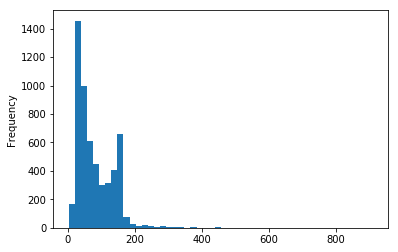

In [18]:
messages['length'].plot.hist(bins=50)

In [19]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

** Looks like highest length size of the message is 910 characters**

** let's try to explore is the length of the message is the distinguish feature between spam and ham message **

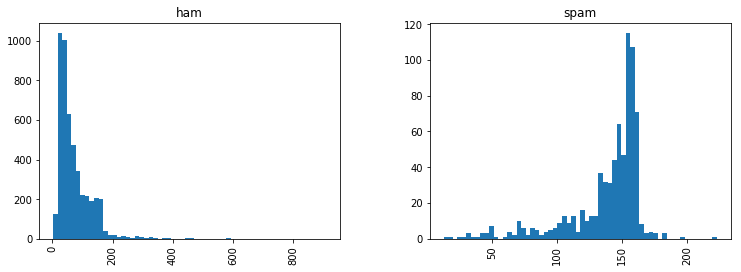

In [20]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4)); #by='label' means create diffrent graph 'ham' and 'spam'

** Spam Messages has more number of characters as compared to Ham messages. **

** Let's do some Text Pre-Processing. If we neeed to do some classfication algorithm then we need some numerical vector values. In order to convert word into vector we will use Bag of words.**

In [21]:
import string

** First, let's  remove the punctuation and try on some sample message. **

In [22]:
mess = 'Sample Message! Notice: it has punctuation.'

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
nopunc = [c for c in mess if c not in string.punctuation]

In [25]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [26]:
''.join(nopunc)

'Sample Message Notice it has punctuation'

In [27]:
from nltk.corpus import stopwords

In [28]:
#stopwords.words('english') #These words are so common, probably it won't be much helpful in order to predict about ham and spam.

In [29]:
nopunc = "".join(nopunc)
nopunc

'Sample Message Notice it has punctuation'

In [30]:
nopunc.split()

['Sample', 'Message', 'Notice', 'it', 'has', 'punctuation']

In [31]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [32]:
clean_mess

['Sample', 'Message', 'Notice', 'punctuation']

In [33]:
# Let's Apply the same to all the messages in the data frame
def text_process(mess):
    '''
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [34]:
messages.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

### let's tokenize the message

In [35]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

Currently all the messages are as list of tokens and now we need to covert each of those messages into a vector the Scikit Learn's models can work with.
we'll do that in three steps using bag-of-words model:

**1. Count how many times does a word occur in each message (known as term frequency).**

**2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency).**

**3. Normalize the vector to unit length, to abstract from the original text length (L2 norm).**

* Let's begin with the first step: *

** Each vector will have as many dimensions as there are unique words in the SMS corpus. We will use Scikit's Learn CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.**

** we can imagine this as a 2-Dimensional matrix. where the 1-dimension is the entire vocabulary(1 row per word) and the other dimension are the actual documents, in this case a column per text message.**

For example:

**|            |Message 1|Message 2|...|Message N|**

**|Word 1 Count|0        |1        |...|0        |**

**|Word 2 Count|0        |1        |...|0        |**

**|...         |         |...      |...|...      |**

**|Word N Count|0        |1        |...|1        |**

Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document.
Beacuse of this, scikit learn will output a  Sparse Matrix (https://en.wikipedia.org/wiki/Sparse_matrix)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [38]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7faf2e2c02f0>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [39]:
print(len(bow_transformer.vocabulary_)) #Total number of unique words present

11425


In [40]:
mess4 = messages['message'][3] #Grab the 4th message
print(mess4)

U dun say so early hor... U c already then say...


In [41]:
bow4 = bow_transformer.transform([mess4])

In [42]:
print(bow4) #It's appear there are 7 unique words present

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [43]:
print(bow4.shape)

(1, 11425)


In [44]:
bow_transformer.get_feature_names()[4068]

'U'

In [45]:
bow_transformer.get_feature_names()[9554]

'say'

In [46]:
messages_bow = bow_transformer.transform(messages['message']) #Let's do the transform on complete dataframe

In [47]:
print('Shape of Sparse Matrix', messages_bow.shape)

Shape of Sparse Matrix (5572, 11425)


In [48]:
messages_bow.nnz #Non_zero Occurences

50548

### Weight and Normalization is done using TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer

In [50]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [51]:
tfidf4 = tfidf_transformer.transform(bow4) #For Example - For the Fourth Message

In [52]:
print(tfidf4) #weight values of each of the words

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [53]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [54]:
messages_tfidf

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

#### Messages are finally converted to an vector

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
spam_detect_model = RandomForestClassifier().fit(messages_tfidf,messages['label'])

/home/pandit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype=object)

In [58]:
messages['label'][3]

'ham'

In [59]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [60]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

** Proper way to do is using train-test-split **

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['label'],test_size=0.3, random_state=42)

** Pipeline helps to save the complete workflow **

In [63]:
from sklearn.pipeline import Pipeline

In [64]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [65]:
pipeline.fit(msg_train, label_train)

/home/pandit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7faf2e2c02f0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [66]:
predictions = pipeline.predict(msg_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1448
        spam       1.00      0.78      0.88       224

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672

